## Step 1: Importing Required Libraries

We start by importing the fundamental libraries required for data analysis and manipulation:

- `pandas` for handling tabular data,
- `numpy` for numerical operations.
- `matplotlib.pyplot` and `seaborn` for data visualization.
- `sklearn` for data preprocessing, model training, and model evaluation.
- `imblearn` for handling class imbalance.


These will serve as the core tools for our preprocessing and modeling pipeline.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Step 2: Loading the Telco Customer Churn Dataset

We load the dataset using `pandas.read_csv()`. This dataset includes details about telecom customers, including their demographics, services they’ve subscribed to, and whether or not they have churned (i.e., left the company).  

This is the raw data on which we will perform cleaning, analysis, and build predictive models.


In [2]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Step 3: Initial Data Exploration

To understand the data structure, we use:
- `df.shape` to check dataset size,
- `df.head()` to preview records,
- `df.info()` to identify data types and nulls,
- `df.describe()` to view statistics of numeric fields.

This helps us identify issues like incorrect data types, missing values, and outliers.

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Step 4: Data Cleaning



### 4.1 Convert 'TotalCharges' to Numeric

The `TotalCharges` column was incorrectly loaded as an object due to presence of blank entries.  
We use `pd.to_numeric(errors='coerce')` to convert it to float, coercing invalid entries to NaN.


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 4.2 Handle Missing Values

After conversion, 11 rows had `NaN` values in `TotalCharges`.  
Since these are very few and likely represent customers with very short tenure, we safely drop them using `df.dropna()`.

In [9]:
df.dropna(subset = ['TotalCharges'], inplace = True)

### 4.3 Validate Cleaned Data

We verify:
- Data shape has changed to 7032 rows,
- No missing values remain,
- Data types are correct,
- Summary statistics make sense.

At this point, the dataset is clean and ready for analysis.


In [10]:
df.shape

(7032, 21)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### 4.4 Check for Uniqueness of `customerID`

Before proceeding to analysis, it's important to ensure that the `customerID` column — which acts as the unique identifier for each customer — contains only unique values.

This step helps verify data integrity by checking for any duplicate entries that may have been mistakenly included in the dataset. Duplicates in a primary key column could lead to incorrect assumptions or bias in model training and analysis.

We use the `duplicated()` method to find any repeated customer IDs. If the number of duplicated records is zero, we can safely confirm the uniqueness of the `customerID` column.


In [14]:
duplicate_ids = df[df.duplicated('customerID', keep = False)]
duplicate_ids.shape[0]

0

## Step 5: Exploratory Data Analysis (EDA)

### 5.1 Check Target Variable Distribution: `Churn`

We begin EDA by examining the target variable `Churn`. This tells us whether the dataset is balanced or imbalanced in terms of the customers who have churned (left the service) versus those who have not.

A balanced target means we have roughly equal numbers of churned and non-churned customers. A class imbalance can significantly affect model performance. For example, if 80% of the customers have not churned, a model could just predict "No" for everything and still be 80% accurate — but that wouldn't be useful! 

Hence, checking the class distribution early helps us plan ahead for model evaluation and training strategies.

We will:
- Use `value_counts()` to see the exact numbers.

In [15]:
# Count churn values
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

### 5.2 Visualize Target Variable Distribution: `Churn`

While numerical counts give an idea of churn distribution, visualizing it helps quickly spot class imbalance, which is crucial for model building.

A bar plot of the `Churn` column will visually show how many customers stayed (`No`) and how many left (`Yes`). This is an important part of EDA because:

- A large imbalance (e.g., too many `No`s compared to `Yes`s) can bias machine learning models.
- We might need to apply balancing techniques (like oversampling, undersampling, or class weighting) later during training.
- It sets the stage for understanding churn trends among other variables.

We will use Seaborn’s `countplot()` to display this class distribution.


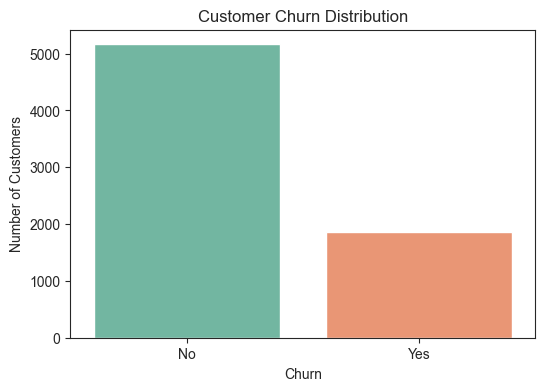

In [16]:
sns.set_style("ticks")
plt.figure(figsize = (6, 4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

### 5.3 Calculate Churn Class Percentages

To better understand the class imbalance, we calculate the percentage of customers who churned (`Yes`) and who did not (`No`). This numeric insight complements the visual plot and helps in identifying the degree of imbalance in the target variable.

We use the `value_counts(normalize=True)` function, which returns the relative frequencies of each class as proportions. Multiplying by 100 converts these to percentages.

In [17]:
churn_percentages = df['Churn'].value_counts(normalize = 'True') * 100
print(churn_percentages)

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


### 5.4 Analyze Categorical Features: `Contract` vs `Churn`

We investigate how churn varies across different contract types.

- The `Contract` feature indicates the duration of the customer’s contract (e.g., month-to-month, one year, two year).
- Customers with month-to-month contracts typically show higher churn.
- Visualizing this relationship helps identify important predictors for churn.


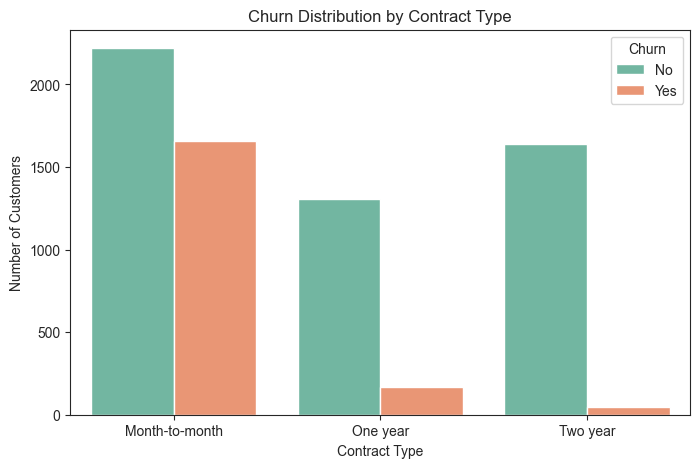

In [18]:
sns.set_style("ticks")
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'Contract', hue = 'Churn', palette = 'Set2')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

### 5.5 Churn Distribution by Internet Service Type

We analyze how customer churn varies by the type of internet service they use. This may reveal whether certain services (like fiber optic) are more associated with customer loss.

A countplot with `hue='Churn'` will show how many customers stayed or left for each internet service category (`DSL`, `Fiber optic`, `No`).


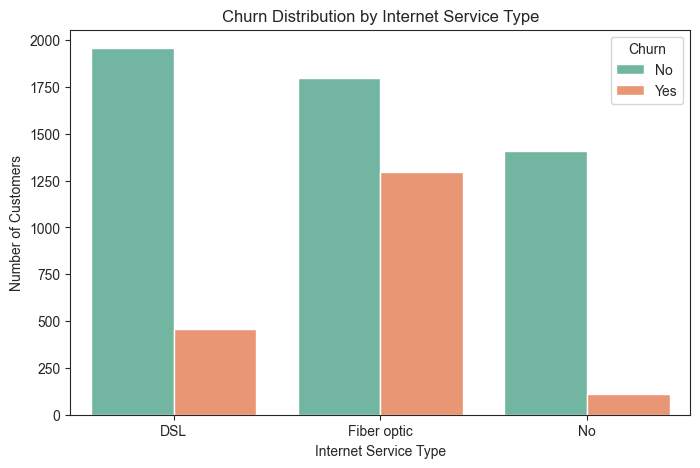

In [19]:
sns.set_style('ticks')
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'InternetService', hue = 'Churn', palette = 'Set2')
plt.title('Churn Distribution by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

### 5.6 Churn by `OnlineSecurity`

The `OnlineSecurity` feature tells us whether a customer subscribed to an online security service. This service is typically considered a value-add for internet users.

Analyzing churn across this feature helps us understand:

- Whether having **security protection** correlates with customer loyalty.
- Whether **not having security** might be associated with higher churn.
- The behavior of customers with **no internet service** (a third category).

This can give insight into how value-added services might reduce churn.


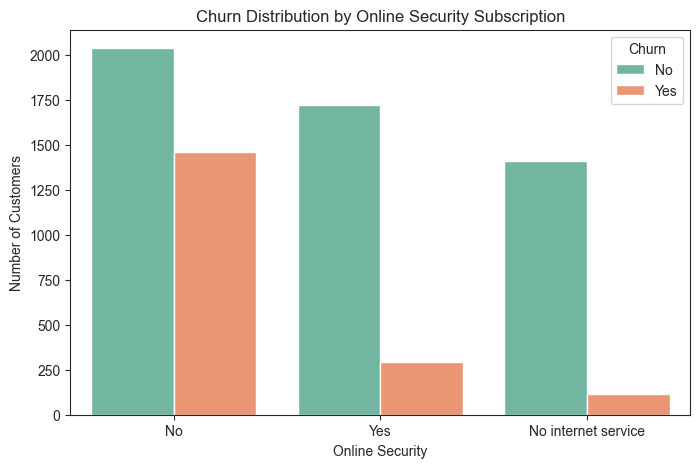

In [20]:
sns.set_style('ticks')
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'OnlineSecurity', hue = 'Churn', palette = 'Set2')
plt.title('Churn Distribution by Online Security Subscription')
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()


### 5.7 Analyze Churn with Other Service Features

To deepen our understanding of customer churn behavior, we now explore other service-related features like:

- Online Backup
- Device Protection
- Tech Support
- Streaming TV
- Streaming Movies

These optional services may influence customer satisfaction. Customers who **don't use these services** might be **more likely to churn**, either because they are less engaged or didn't see enough value in the subscription.

We will visualize each of these against the `Churn` column to look for such patterns.


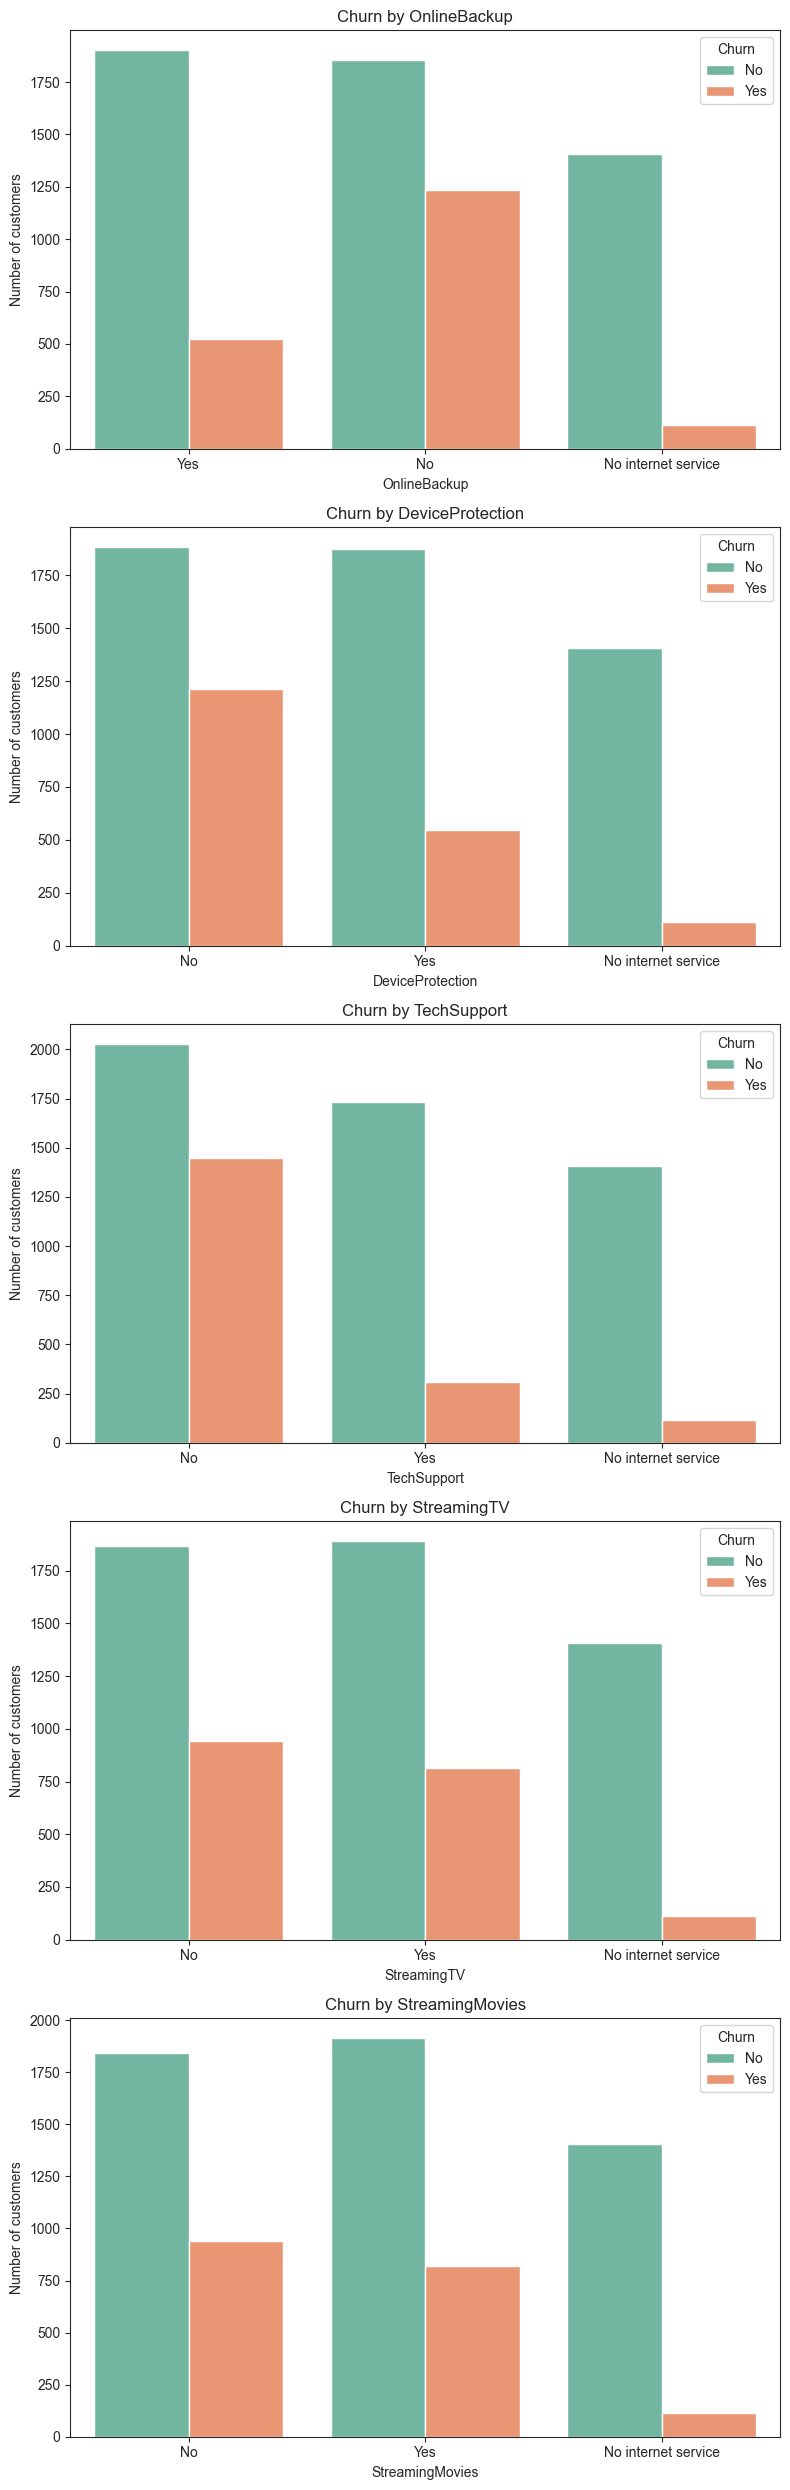

In [21]:
service_features = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

n_features = len(service_features)
n_cols = 1 
n_rows = n_features 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, n_rows * 5)) 
axes = axes.flatten()


for i, feature in enumerate(service_features):
    ax = axes[i] 
    sns.countplot(data=df, x=feature, hue='Churn', palette='Set2', ax=ax)
    ax.set_title(f'Churn by {feature}')
    ax.set_ylabel('Number of customers')
    ax.legend(title='Churn')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

### 5.8 Explore Numerical Features vs Churn

Understanding how numerical features like `tenure`, `MonthlyCharges`, and `TotalCharges` relate to customer churn helps us detect behavioral trends.

We’ll use **boxplots** and **histograms** to compare distributions of these features across churned and non-churned customers.


### 5.8.1 Churn vs Tenure: Boxplot

The `tenure` feature shows how long a customer has stayed with the company.

By plotting it against churn, we can see whether customers who left typically had shorter tenures compared to those who stayed. 

This boxplot helps visualize:
- Median tenure
- Range and spread
- Outliers in both churn classes

We expect churned customers to have **lower median tenure**.


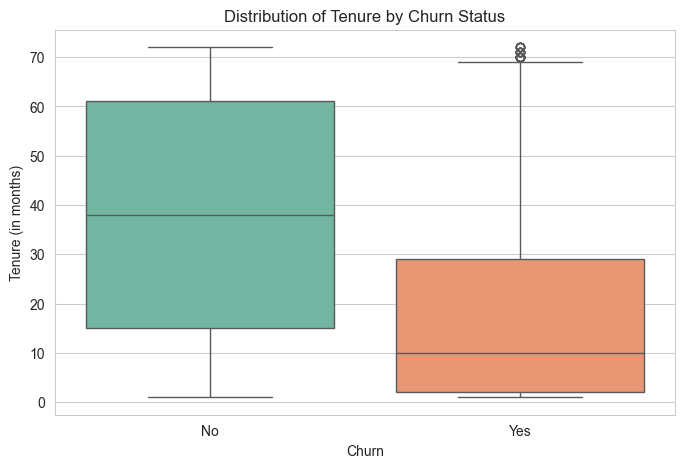

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 5))
sns.boxplot(data = df, x = 'Churn', y = 'tenure', hue = 'Churn', palette = 'Set2', dodge = False)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (in months)')
plt.show()

### 5.8.2 Explore Monthly Charges Distribution by Churn

To understand how the monthly charges differ between customers who churn and those who do not, we use a violin plot.  

This visualization helps us see the distribution, density, median, and spread of monthly charges for each churn class, highlighting if customers with certain charge ranges are more likely to churn.


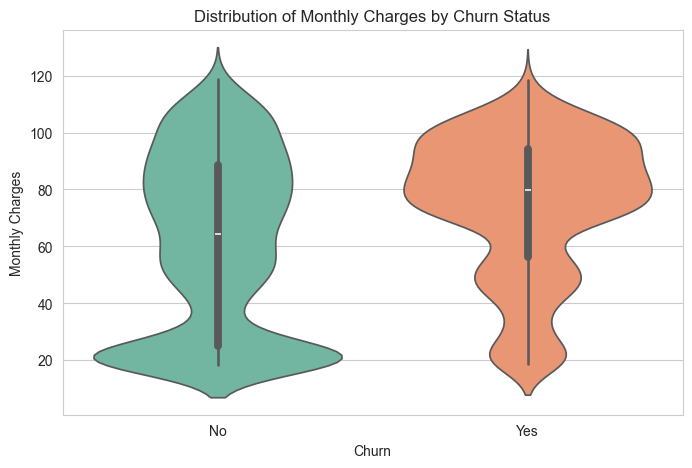

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 5))
sns.violinplot(data = df, x = 'Churn', y = 'MonthlyCharges', hue = 'Churn', palette = 'Set2', dodge = False)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

### 5.8.3 – Strip Plot for TotalCharges vs Churn

We use a strip plot to visualize the distribution of `TotalCharges` for churned and non-churned customers. This helps in identifying patterns, density, and any outliers that may not be clearly visible in box or violin plots. Although it's prone to overlapping points, it provides raw insight into the distribution of individual data points.

This visual will help us determine if there's any significant difference in the `TotalCharges` variable between the two churn groups.


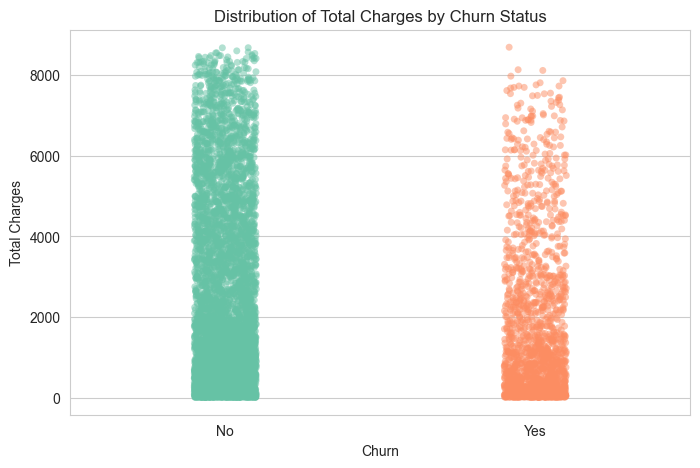

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 5))
sns.stripplot(data = df, x = 'Churn', y = 'TotalCharges', hue = 'Churn', palette = 'Set2', dodge = False, alpha = 0.5, jitter = True)
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

### 5.8.4 Box Plot – Distribution of Total Charges by Churn

This box plot shows the distribution of `TotalCharges` for churned and retained customers. It helps us understand the central tendency and spread of total charges for both categories, along with any outliers. This can reveal patterns like whether high-spending customers are more or less likely to churn.


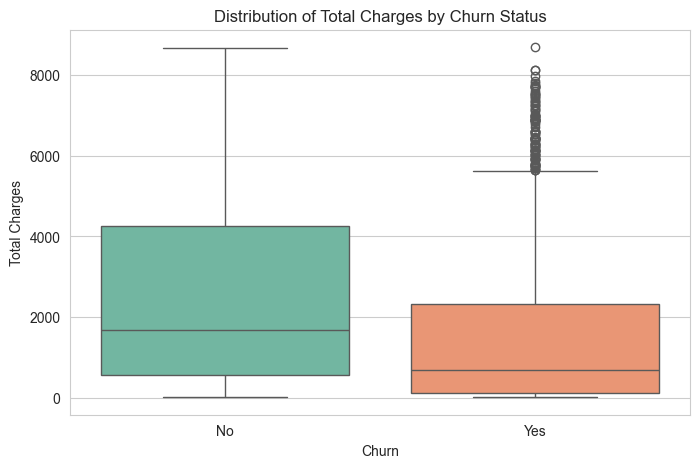

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 5))
sns.boxplot(data = df, x = 'Churn', y = 'TotalCharges', hue = 'Churn', palette = 'Set2', dodge = False)
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

### 5.9 Correlation Heatmap of Numerical Features

To understand the linear relationships between numerical features, we plot a correlation heatmap. This helps identify multicollinearity and spot features that are strongly correlated with each other. This is especially useful when selecting features for model building.


In [26]:
numerical_features = df.select_dtypes(include = ['int64', 'float64'])
corr_matrix = numerical_features.corr()
print("Correlation Matrix:\n")
print(corr_matrix)

Correlation Matrix:

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


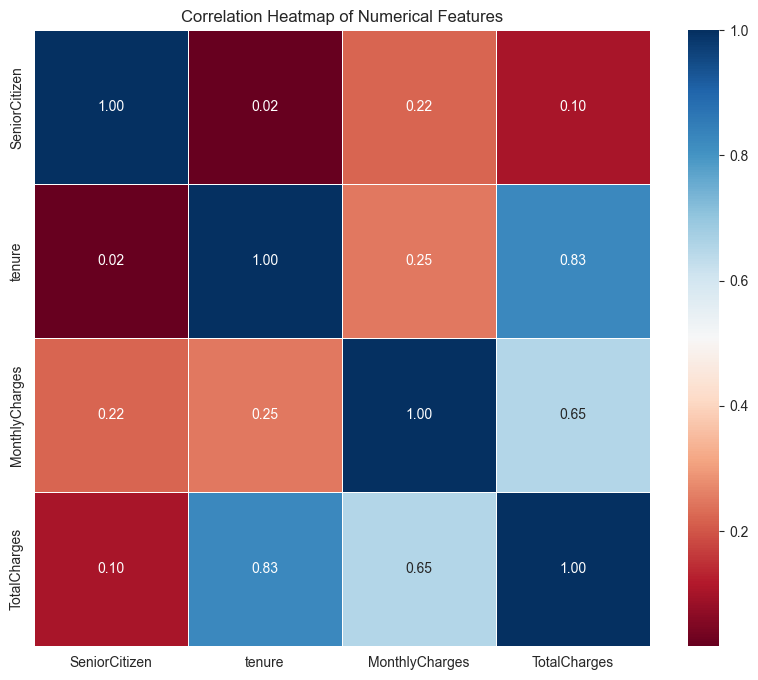

In [27]:
sns.set_style('white')
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'RdBu', fmt = '.2f', square = True, linewidth = 0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 5.10 Distribution of Numerical Features by Churn Status

To better understand how the numerical features are distributed across churn categories, we plot histograms for each key numerical feature: **MonthlyCharges**, **TotalCharges**, and **tenure**. 

These histograms show the count of customers for each range of feature values, separated by churn status (`Yes` or `No`). Including a kernel density estimate (KDE) curve helps us see the distribution shape more smoothly.

By analyzing these plots, we can observe patterns such as whether churned customers tend to have higher monthly charges or longer tenure, which can guide feature selection and model building.


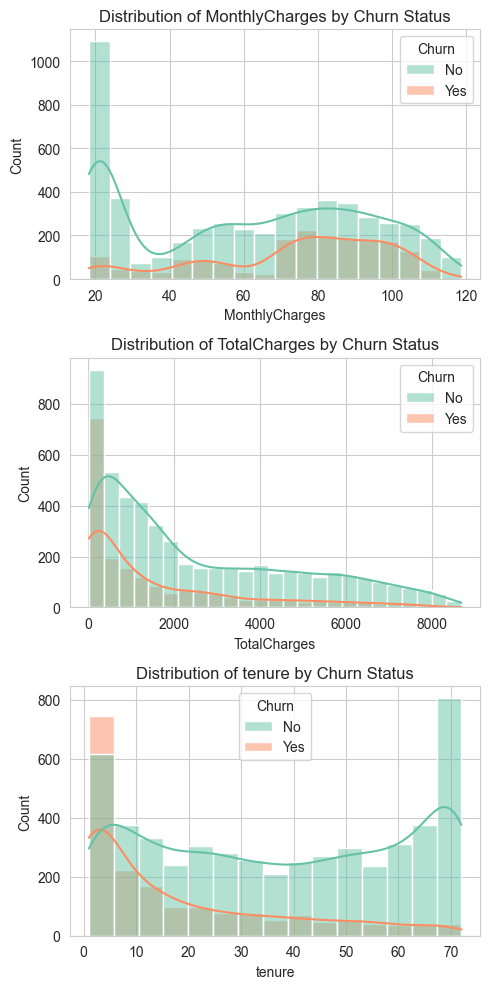

In [28]:
sns.set_style('whitegrid')
num_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

plt.figure(figsize=(5, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)
    sns.histplot(data=df, x=feature, hue='Churn', kde=True, palette='Set2')
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### 5.11 Pair Plot of Key Numerical Features

To visualize relationships between numerical features and how they vary with churn, we use a pair plot. This allows us to explore feature interactions and spot patterns or clusters that may differentiate churned and non-churned customers.

- The diagonal shows distributions of each individual feature by churn status.
- Off-diagonal scatter plots show how feature pairs relate, colored by churn.
- This helps in identifying potential trends, separation between churn classes, and correlation among features.

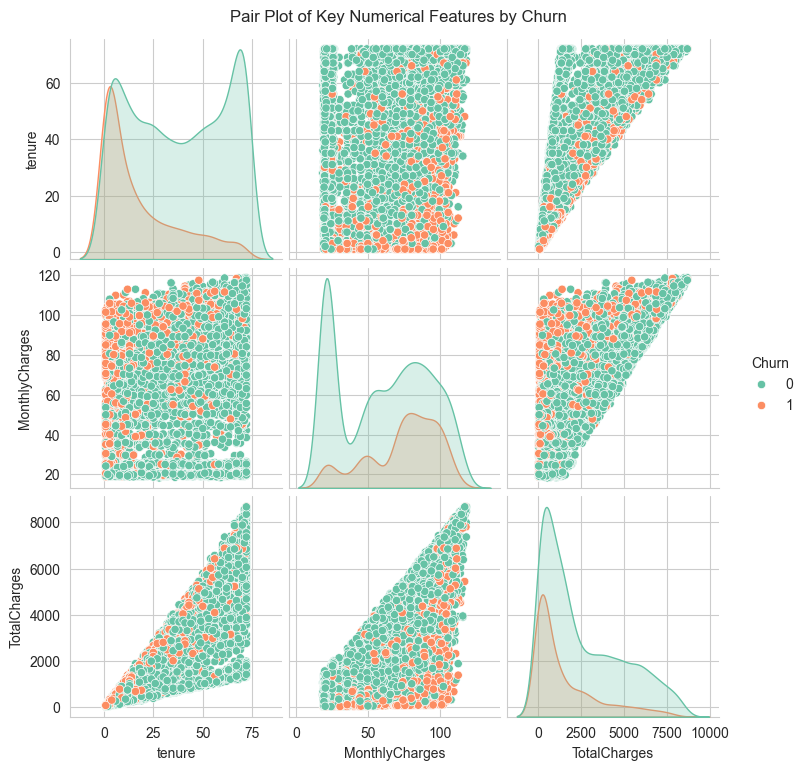

In [29]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Convert 'Churn' to numeric for coloring in the pair plot
df_pairplot = df.copy()
df_pairplot['Churn'] = df_pairplot['Churn'].map({'Yes': 1, 'No': 0})

sns.pairplot(df_pairplot[num_features], hue='Churn', palette='Set2')
plt.suptitle("Pair Plot of Key Numerical Features by Churn", y=1.02)
plt.show()

## Step 6: Data Preprocessing and Feature Engineering

### 6.1 Dropping Irrelevant Identifier Column

The `customerID` column uniquely identifies each customer but holds no predictive value for churn. Including such identifiers in the model can introduce noise or lead to overfitting. Therefore, we drop it from the dataset.


In [30]:
df.drop('customerID', axis = 1, inplace = True)

### 6.2 Identifying Categorical and Numerical Features

To begin preprocessing, we classify our dataset columns into:

- **Categorical Features:** These represent categories or groups, usually of type `object` (e.g., gender, Contract).
- **Numerical Features:** These are numeric values, usually of type `int64` or `float64` (e.g., tenure, MonthlyCharges).

This distinction helps us decide the right transformations for each group.


In [31]:
# Separate categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:\n", categorical_features)
print("\nNumerical Features:\n", numerical_features)


Categorical Features:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical Features:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### 6.3 Encode Categorical Variables

We apply:
- Label Encoding to binary categorical variables (e.g., Yes/No, Male/Female),
- One-Hot Encoding to multi-class categorical variables (e.g., InternetService, Contract).

Label Encoding is efficient for binary variables and avoids unnecessary dimensionality.  
One-Hot Encoding avoids misleading ordering for multi-class variables.


In [32]:
# Label encode binary categorical features (excluding the target feature)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode multi-class categorical features
multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns = multi_class_cols, drop_first = True)

### 6.4 Encode Target Variable (Churn)

We encode the target variable `Churn` using Label Encoding:

- `Yes` → `1`
- `No` → `0`

This prepares the target for use in binary classification models.


In [33]:
df['Churn'] = le.fit_transform(df['Churn'])

### 6.5 Feature Scaling of numerical columns

Some machine learning models (like logistic regression, SVM, and KNN) are sensitive to the scale of features.

Here:
- We scale only the numerical features using **StandardScaler** (mean = 0, std = 1)
- Dummy variables from one-hot encoding and binary label-encoded columns are left unchanged
- The target variable `Churn` is **not scaled**

This ensures a uniform scale among features, improving model performance and convergence.


In [34]:
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03
mean,2.627149e-17,-1.126643e-16,6.062651e-17,-1.119064e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.403271e-01,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,-4.403271e-01,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,-4.403271e-01,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,-4.403271e-01,9.199259e-01,8.331482e-01,6.668271e-01
max,2.271039e+00,1.612573e+00,1.793381e+00,2.824261e+00


## Step 7: Splitting Data for Model Training and Evaluation

### 7.1 Separate Features and Target Variable

Before training a model, we must separate the dataset into:
- **Features (X):** All input columns used to predict churn.
- **Target (y):** The `Churn` column, which we are trying to predict.

# Separate features and target
X = df.drop('Churn', axis = 1)
y = df['Churn']

### 7.2 Split the Data into Training and Testing Sets

To evaluate model performance on unseen data:
- We split the data into **Training Set (80%)** and **Testing Set (20%)**.
- We use `train_test_split` from scikit-learn with:
  - `random_state=42` to ensure reproducibility.
  - `stratify=y` to maintain the same churn ratio in both sets

In [36]:
# Step: Splitting features and target
X = df.drop('Churn', axis=1)   # Assuming 'Churn' is your target column
y = df['Churn']


In [37]:
# Step: Train-Test Split (80% train, 20% test)
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [38]:
# Print the shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (5625, 30)
Testing features shape: (1407, 30)
Training labels shape: (5625,)
Testing labels shape: (1407,)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int32  
 1   SeniorCitizen                          7032 non-null   float64
 2   Partner                                7032 non-null   int32  
 3   Dependents                             7032 non-null   int32  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int32  
 6   PaperlessBilling                       7032 non-null   int32  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int32  
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

## Step 8: Handling Class Imbalance

### 8.1 Apply `SMOTE (Synthetic Minority Over-sampling TEchnique)` on training data

In this substep, we address the class imbalance in the target variable `Churn`. Our dataset contains significantly more "No" labels than "Yes" labels, which can bias the model toward predicting "No" too often.

To correct this imbalance, we use **SMOTE**, a powerful method that generates synthetic samples for the minority class rather than simply duplicating existing rows.

SMOTE generates new, plausible examples by interpolating between existing minority class samples. This helps the model learn better patterns from the minority class, improving its predictive performance on both classes.

Applying SMOTE to the test set would distort the real-world class distribution. Since our test set is meant to simulate actual unseen data, we leave it untouched and apply SMOTE only to the training data (`X_train`, `y_train`).

We’ll use `SMOTE()` from the `imblearn.over_sampling` module.


In [40]:
smote = SMOTE(random_state = 42)

# Apply SMOTE only on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [41]:
print("Resampled training features shape:", X_train_resampled.shape)
print("Resampled training labels shape:", y_train_resampled.shape)

Resampled training features shape: (8260, 30)
Resampled training labels shape: (8260,)


### 8.2 Confirm balance after SMOTE

Now that we've applied SMOTE, we need to verify whether the class distribution is balanced. This step is essential to ensure that synthetic oversampling has correctly equalized the number of samples in both classes.

In [42]:
# Check class distribution after SMOTE
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after SMOTE:")
for label, count in zip(unique, counts):
    print(f"Class {label}: {count}")


Class distribution after SMOTE:
Class 0: 4130
Class 1: 4130


In [43]:
pd.Series(y_train_resampled).value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

## Step 9: Feature Scaling on Resampled Data

Now that class imbalance has been addressed using SMOTE, we perform feature scaling on the resampled training data.

- We use **StandardScaler** to scale all features to have a mean of 0 and standard deviation of 1.
- The scaler is **fitted only on the resampled training features**.
- The same scaler is then used to **transform the test features**.
- This ensures consistency and prevents data leakage.

Feature scaling is especially important for models like Logistic Regression, SVM, and KNN which are sensitive to the scale of input features.


In [44]:
X_train_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

print("Scaled training features shape:", X_train_scaled.shape)
print("Scaled test features shape:", X_test_scaled.shape)

Scaled training features shape: (8260, 30)
Scaled test features shape: (1407, 30)


In [45]:
# Initialize the model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on resampled training data
logreg_model.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7299218194740583

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1033
           1       0.49      0.70      0.58       374

    accuracy                           0.73      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.73      0.74      1407


Confusion Matrix:
 [[766 267]
 [113 261]]


## Step 10: Train & Compare Multiple Models

We will now train several classifiers on our SMOTE‑balanced, scaled data:

- Decision Tree  
- Random Forest  
- Support Vector Machine (SVM)  
- K‑Nearest Neighbors (KNN)  

For each model, we will report:
- Accuracy  
- Precision  
- Recall  
- F1‑Score  
- Confusion Matrix  


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [47]:


models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    preds = model.predict(X_test_scaled)
    predictions[name] = preds


## Step 11: Evaluate & Compare Models

Now we print the evaluation metrics for each model on the test set.


In [48]:
for name, preds in predictions.items():
    print(f"=== {name} ===")
    print(f"Accuracy       : {accuracy_score(y_test,    preds):.4f}")
    print(f"Precision      : {precision_score(y_test,   preds):.4f}")
    print(f"Recall         : {recall_score(y_test,      preds):.4f}")
    print(f"F1‑Score       : {f1_score(y_test,          preds):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    print("Classification Report:")
    print(classification_report(y_test, preds))
    print("\n" + "-"*60 + "\n")


=== Decision Tree ===
Accuracy       : 0.7292
Precision      : 0.4924
Recall         : 0.6043
F1‑Score       : 0.5426
Confusion Matrix:
[[800 233]
 [148 226]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1033
           1       0.49      0.60      0.54       374

    accuracy                           0.73      1407
   macro avg       0.67      0.69      0.68      1407
weighted avg       0.75      0.73      0.74      1407


------------------------------------------------------------

=== Random Forest ===
Accuracy       : 0.7704
Precision      : 0.5576
Recall         : 0.6604
F1‑Score       : 0.6047
Confusion Matrix:
[[837 196]
 [127 247]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1033
           1       0.56      0.66      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71     